## Regresja liniowa wieloraka

Rzadko kiedy zdarza się taka sytuacja, że zależność opisuje się na podstawie tylko jednej zmiennej. Z reguły na wynik zmiennej objaśnianej ($y$) ma wpły więcej różnych cech. Przykładowo, na cenę samochodu ma wpływ rok produkcji, przebieg, ilość koni mechanicznych itp. Dlatego właśnie jest naturalna potrzeba rozwinięcia algorytmu regresji liniowej z jedną cechą na większą ilość cech.

Algorytm, który implementowaliśmy w poprzednim zadaniu jest szczególnym przypadkiem regresji liniowej, ale może zostać on w łatwy sposób uogólniony. Mechanizmy, które poznaliśmy wcześniej takie jak obliczanie funkcji błędu, pochodnych cząstkowych, w dalszym ciągu są aktualne. Trzeba jedynie uwzględnić dodatkowe cechy.

### Zadanie 1

W zbiorze danych z zarobkami, który wykorzystywany był w poprzednim zadaniu, znajduje się pominięta wcześniej cecha. Wczytaj dane z pliku Salary.csv, tym razem z dwiema zmiennymi objaśniającymi: YearsExperience i Age oraz zmienną objaśnianą Salary. Stwórz wykres 3D przedstawiający dane.

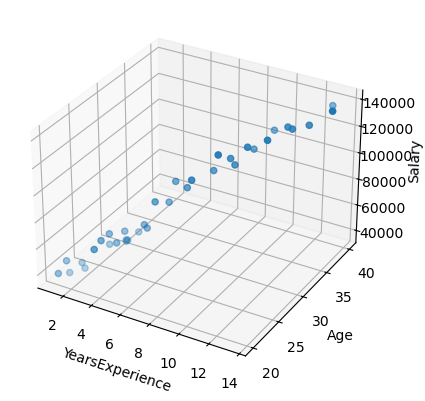

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('datasets/Salary.csv', sep=',')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['YearsExperience'], df['Age'], df['Salary'])

ax.set_xlabel('YearsExperience')
ax.set_ylabel('Age')
ax.set_zlabel('Salary')

plt.show()



## Zadanie 2

Przerób algorytm znajdujący się w funkcji _learn_and_fit(x,y)_ w taki sposób, aby uwzględniał dodatkową cechę.
Funkcja regresji liniowej przybierze w tym momencie postać:

\begin{equation}
f(x^{(i)}) = \beta_{0} + \beta_{1}x_1 + \beta_{2}x_2 = \beta_{0} + \beta_{1} YearsExperience + \beta_{2} Age
\end{equation}

Pojawienie się kolejnej cechy wymaga akutalizacji obliczania gradientu. Należy dodatkowo obliczyć pochodną cząstkową względem parametru $\beta_{2}$, a następnie zaktualizować wartość tego parametru. 

Obliczenie pochodnej cząstkowej wygląda analogicznie jak w przypadku parametru $\beta_{1}$.

\begin{equation}
    \frac{\partial SSR}{\partial \beta_{2}} = \frac{1}{n} \sum^{n}_{i=1} (f(x^{(i)}) - y^{(i)})x_{1}^{(i)}
\end{equation}

Aktualizacja wartości współczynnika również jest analogiczna.

\begin{equation}
    \beta_{2} = \beta_{2} - \alpha \frac{\partial SSR}{\partial \beta_{2}} 
\end{equation}

_Uwaga: Zastanów się, w jaki sposób zaimplementować obługę kolejnych cech, tak aby po pojawieniu się 3 cechy nie trzeba było modyfikować algorytmu._

In [2]:

from typing import Tuple, List

def initialize_coefficients(n: int = 2, alpha = None) -> Tuple[float, np.ndarray]:
    if alpha is None:
        alpha = 0.0001
    else:
        alpha = alpha
    betas = np.random.rand(n)
    return alpha, betas


def calculate_regression_function(X: np.ndarray, betas: np.ndarray) -> np.ndarray:
    return betas[0] + np.dot(X, betas[1:])


def calculate_error(X: np.ndarray, y: np.ndarray, betas: np.ndarray) -> float:
    summand = calculate_regression_function(X, betas) - y
    error = np.sum(summand**2)/(2*len(X))
    return error


def calculate_gradient(X: np.ndarray, y: np.ndarray, betas: np.ndarray) -> np.ndarray:
    gradient = np.zeros(len(betas)) 
    gradient[0] = np.sum(calculate_regression_function(X, betas) - y) / len(X)
    
    for i in range(1, len(betas)):
        gradient[i] = np.sum((calculate_regression_function(X, betas) - y) * X[:, i-1]) / len(X)
    
    return gradient

def update_regression_coefficients(X: np.ndarray, y: np.ndarray, betas: np.ndarray, alpha: float) -> np.ndarray:
    gradient = calculate_gradient(X, y, betas)
    betas = betas - alpha * gradient
    return betas

In [3]:
'''
input:
X - wartości zmiennych objaśniających YearsExperience oraz Age dla wszystkich obserwacji
y - wartości zmiennej objaśnianej Salary dla wszystkich obserwacji

output:
b0: [] - lista z współczynnikami beta_0 w każdej z epok
betas: [] - lista z współczynnikami beta_1, beta_2 w każdej z epok
error: [] - lista z błędem w każdej epoce
'''


def learn_and_fit(X: np.ndarray, y: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    epoch_number = 10000
    alpha, betas_coeffitients = initialize_coefficients(len(X[0]) + 1, None)
    b0 = np.array(betas_coeffitients[0])
    betas = np.array(betas_coeffitients[1:])
    error = np.array(calculate_error(X, y, betas_coeffitients))
    
    for i in range(epoch_number):
        betas_coeffitients = update_regression_coefficients(X,y,betas_coeffitients, alpha)
        b0 = np.append(b0, betas_coeffitients[0])
        betas = np.append(betas, betas_coeffitients[1:])
        error = np.append(error, calculate_error(X, y, betas_coeffitients))
    return b0, betas, error

### Zadanie 3

Do stworzonego z zadaniu 1 wykresu dodaj płaszczyznę regresji. Stwórz 3 wykresy przedstawiające jak zmieniała się funkcja regresji na przestrzeni epok (pierwsza, środkowa, ostatnia epoka).

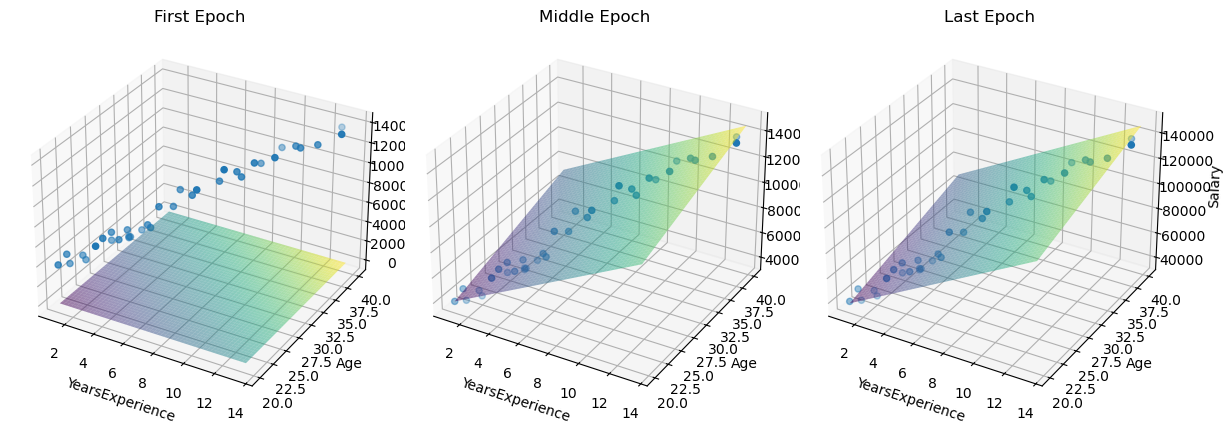

In [18]:
df = pd.read_csv('datasets/Salary.csv', sep=',')
X = df[['YearsExperience', 'Age']].values
y = df['Salary'].values


b0_values, betas_values, error_values = learn_and_fit(X, y)


fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')


ax1.scatter(df['YearsExperience'], df['Age'], df['Salary'])
ax2.scatter(df['YearsExperience'], df['Age'], df['Salary'])
ax3.scatter(df['YearsExperience'], df['Age'], df['Salary'])


ax1.set_title('First Epoch')
ax2.set_title('Middle Epoch')
ax3.set_title('Last Epoch')
ax1.set_xlabel('YearsExperience')
ax1.set_ylabel('Age')
ax1.set_zlabel('Salary')
ax2.set_xlabel('YearsExperience')
ax2.set_ylabel('Age')
ax2.set_zlabel('Salary')
ax3.set_xlabel('YearsExperience')
ax3.set_ylabel('Age')
ax3.set_zlabel('Salary')


for ax, index in zip([ax1, ax2, ax3], [0, len(b0_values)//2, len(b0_values)-1]):
    b0 = b0_values[index]
    betas = betas_values[index*2:(index+1)*2]
    if len(betas) == 2: 
        x_vals, y_vals = np.meshgrid(np.linspace(df['YearsExperience'].min(), df['YearsExperience'].max(), 50),
                                     np.linspace(df['Age'].min(), df['Age'].max(), 50))
        z_vals = b0 + betas[0]*x_vals + betas[1]*y_vals
        ax.plot_surface(x_vals, y_vals, z_vals, alpha=0.5, cmap='viridis')

plt.tight_layout()
plt.show()


### Zadanie 4

W sytuacji, w której zbiór danych zawiera więcej zmiennych objaśniających niż 2, niemożliwym staje się wizualizacja prostej regresji i ocena w taki sposób stworzonego modelu. Bardzo przydatnym rozwiązaniem jest wtedy stworzenie wykresu błędów regresji. Jeśli wartości błędu spadają wraz z kolejnymi epokami, oznacza to, że jesteśmy na dobrej drodze, a nasz algorytm działa poprawnie. Celem tego zadania będzie stworzenie finalnego modelu regresji liniowej, który będzie przyjmował dowolną liczbę zmiennych objaśniających.

Na podstawie wcześniejszych implementacji, stwórz implementację funkcji *learn_and_fit_multi(X, y)*, która będzie przyjmować zbiór wejściowy z dowolną ilością kolum (cech). Dla takiego zbioru zbioru danych ma zostać stworzony model regresji. Funkcja podobnie jak wcześniej, ma zwracać współczynniki oraz wartość błędu w każdej epoce. 

W notebooku z opisem regresji liniowej przedstawione zostały wzory na ogólą postać regresji. Przeanalizuj je jeszcze raz i postaraj się je zaimplementować.

Wczytaj zestaw danych *multi_variable_regression.csv* z katalogu datasets. Dane wygenerowane zostały w taki sposób, że są wysoce liniowo zależne. Wartość błędu dla nauczonego modelu powinna być w takim przypadku niewielka. Przetestuj na wczytanym zbiorze swój algorytm.

In [5]:
df = pd.read_csv('datasets/multi_variable_regression.csv', sep=',')
X = df[['x1', 'x2', 'x3', 'x4', 'x5', 'x6']].values
y = df['y'].values
epoch_number = 10000

def learn_and_fit_multi(X: np.ndarray, y: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    
    alpha, betas_coeffitients = initialize_coefficients(len(X[0]) + 1, None)
    b0 = np.array(betas_coeffitients[0])
    betas = np.array(betas_coeffitients[1:])
    error = np.array(calculate_error(X, y, betas_coeffitients))
    
    for i in range(epoch_number):
        betas_coeffitients = update_regression_coefficients(X,y,betas_coeffitients, alpha)
        b0 = np.append(b0, betas_coeffitients[0])
        betas = np.append(betas, betas_coeffitients[1:])
        error = np.append(error, calculate_error(X, y, betas_coeffitients))
    return b0, betas, error



### Zadanie 5

Stwórz wykres przedstawiający zmianę błędu regresji w kolejnych epokach. Napisz co można na jego podstawie wywnioskować.

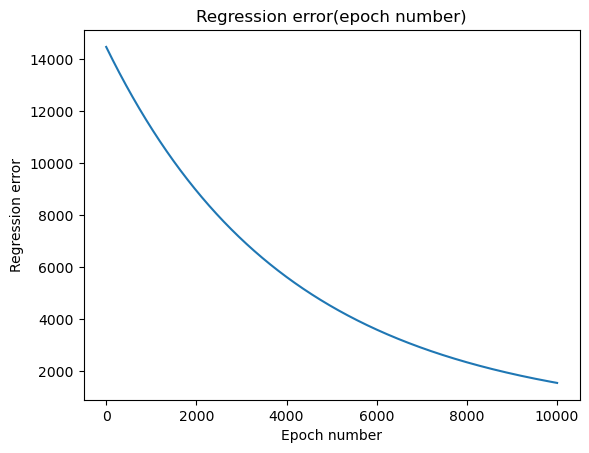

In [7]:
b0, betas, error = learn_and_fit_multi(X, y)
plt.plot(range(epoch_number + 1), error)
plt.xlabel('Epoch number')
plt.ylabel('Regression error')
plt.title('Regression error(epoch number)')
plt.show()

### Zadanie 6

W jaki sposób współczynnik alpha wpływa na działania algorytmu? Przeprowadź eksperyment dla minimum trzech różnych wartości tego parametru. Sformułuj wnioski. Jak zmiana parametru wpłynęła na ilość epok w algorytmie? Jak zmieniła się funkcja regresji?

In [10]:
# YOUR CODE HERE
aim_error = 4000
def error_check(X: np.ndarray, y: np.ndarray):
    for i in [0.055, 0.00098, 0.0023]:
        alpha, betas_co = initialize_coefficients(len(X[0]) + 1, i)
        error = calculate_error(X, y, betas_co)
        epochs_number = 0
       
        while error > aim_error:
            epochs_number += 1
            betas_co = update_regression_coefficients(X, y, betas_co, alpha)
            error = calculate_error(X, y, betas_co)
        print(error)
        print(f"alpha = {alpha}, epochs needed = {epochs_number}\n")

error_check(X, y)

3830.3408913801422
alpha = 0.055, epochs needed = 10

3995.44798535589
alpha = 0.00098, epochs needed = 559

3985.6301353222357
alpha = 0.0023, epochs needed = 238


### Zadanie 7

Porównaj czas działania algorytmu we własnej implementacji oraz implementacji z biblioteki Sklearn.

In [27]:
import time
from sklearn.linear_model import LinearRegression
df = pd.read_csv('datasets/multi_variable_regression.csv', sep=',')
X = df[['x1', 'x2', 'x3', 'x4', 'x5', 'x6']].values
y = df['y'].values
epoch_number = 10000


def sklearn_regression(X, y):
    model = LinearRegression()
    start_time = time.time()
    model.fit(X, y)
    end_time = time.time()
    return end_time - start_time

def my_regression(X,y):
    start_time = time.time()
    learn_and_fit_multi(X, y)
    end_time = time.time()
    return end_time - start_time

print(f"Czas działania mojej implementacji: {my_regression(X,y)} sekund")
print(f"Czas działania implementacji Sklearn: {sklearn_regression(X,y)} sekund")


Czas działania mojej implementacji: 2.566253900527954 sekund
Czas działania implementacji Sklearn: 0.0009984970092773438 sekund
